<a href="https://colab.research.google.com/github/YifeiZhang233eV/Fractals/blob/main/Fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

Import Libraries

In [ ]:
import torch
import numpy as np

In [ ]:
print("PyTorch Version:", torch.__version__)

PyTorch Version: 2.3.1+cu121


Ensure that the right computational device has been set and is available to use when needed

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# grid for computing image, subdivide the space - from -4 to 4 at interval of 0.01
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

In [ ]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)

In [ ]:
# transfer to the GPU device
x = x.to(device)
y = y.to(device)

In [ ]:
# Compute Gaussian
z = torch.exp(-(x**2+y**2)/2.0)

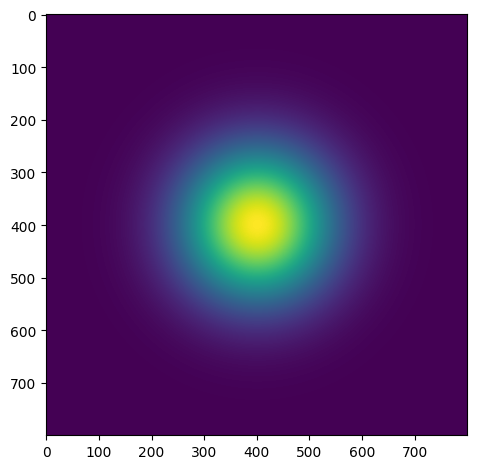

In [ ]:
#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

Q1. Change the Gaussian function into a 2D sine or cosine function

In [ ]:
cos_z = torch.cos(x**2 + y**2)

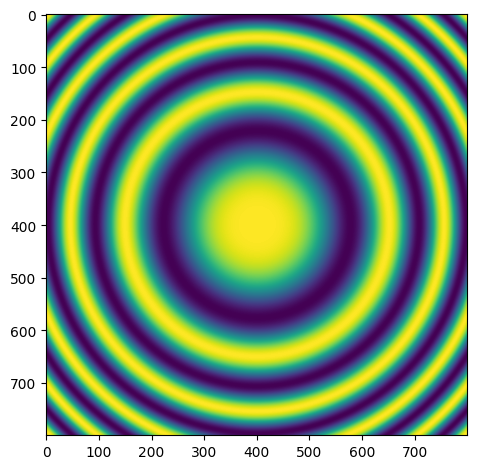

In [ ]:
plt.imshow(cos_z.cpu().numpy())
plt.tight_layout()
plt.show()

In [ ]:
sin_z = torch.sin(x**2 + y**2)

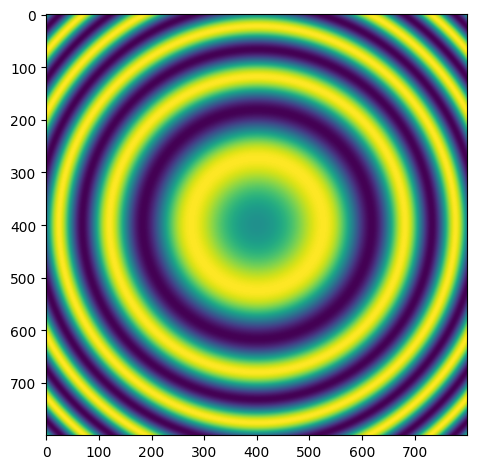

In [ ]:
plt.imshow(sin_z.cpu().numpy())
plt.tight_layout()
plt.show()

Q2. What do you get when you multiply both the Gaussian and the sine/cosine function together and
visualise it?

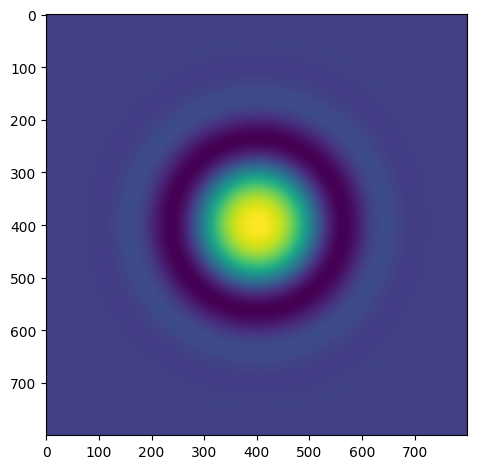

In [ ]:
z_multi_cos = z * cos_z
plt.imshow(z_multi_cos.cpu().numpy())
plt.tight_layout()
plt.show()

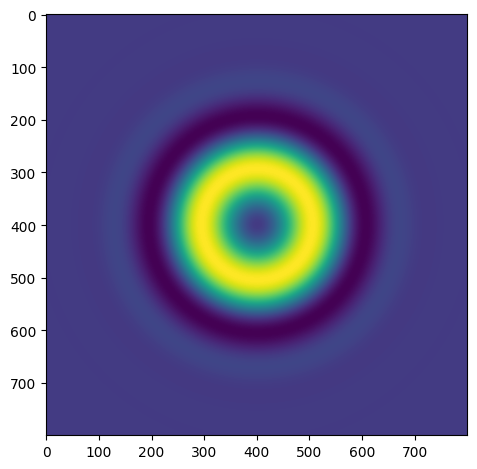

In [ ]:
z_multi_sin = z * sin_z
plt.imshow(z_multi_sin.cpu().numpy())
plt.tight_layout()
plt.show()

# Part 2

### Mandelbrot set

Basic function
> f(z) = Z**2 + c (c is complex number)



In [ ]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

In [ ]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

In [ ]:
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [ ]:
#Mandelbrot Set
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0    # Why < 4.0????
    #Update variables to compute
    ns += not_diverged
    zs = zs_

<ipython-input-24-142891325d3d>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


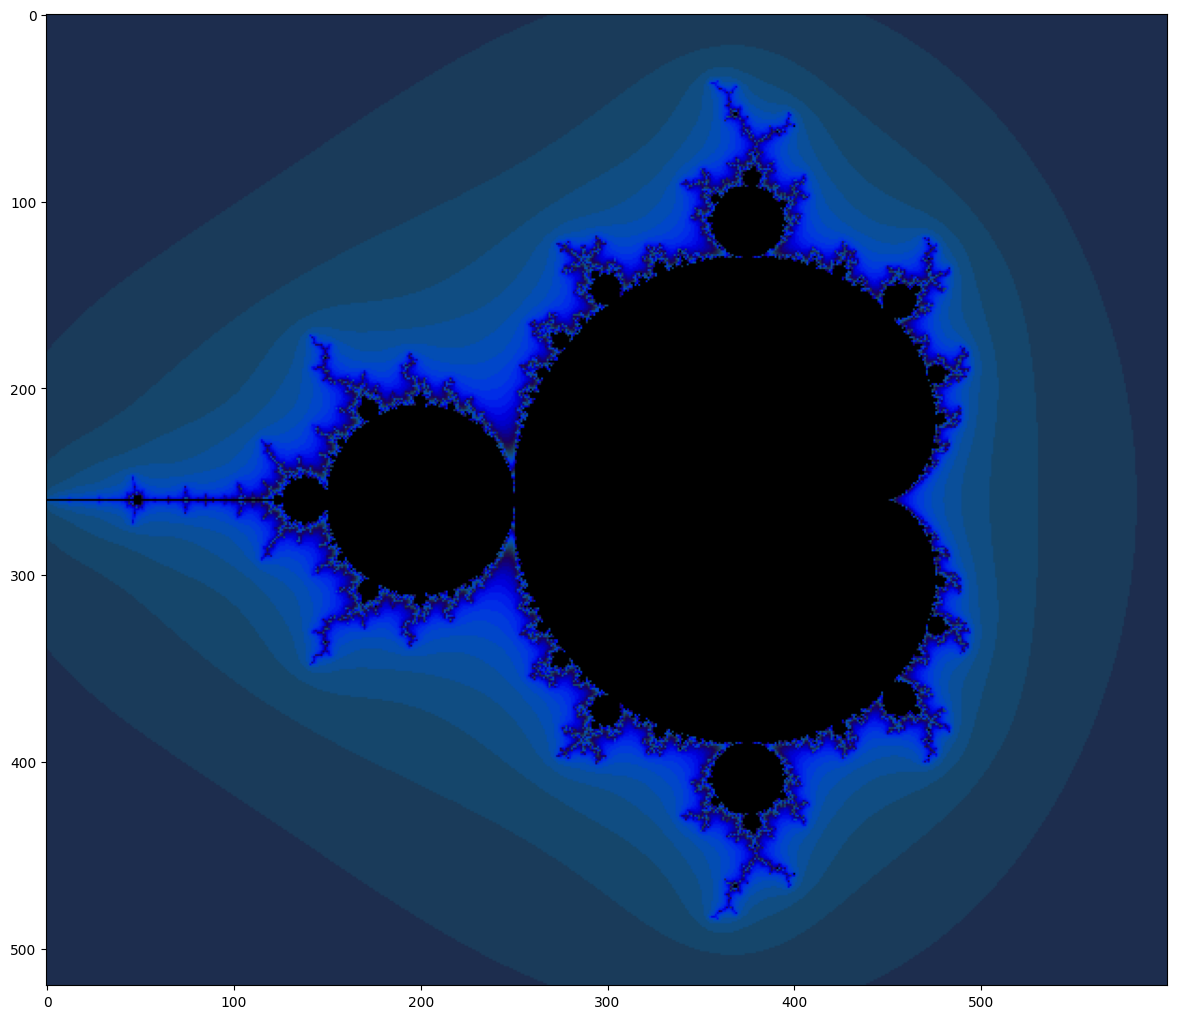

In [ ]:
#plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Q1. High resolution computation of the set by decreasing the mgrid spacing and zooming to another part of the Mandelbrot set and compute the image for it. This may increase the computation time significantly, so choose a value that balances quality of the image and time spent.

<ipython-input-33-e2f2988eec48>:38: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255)) #把图像数据进行裁剪到[0, 255]


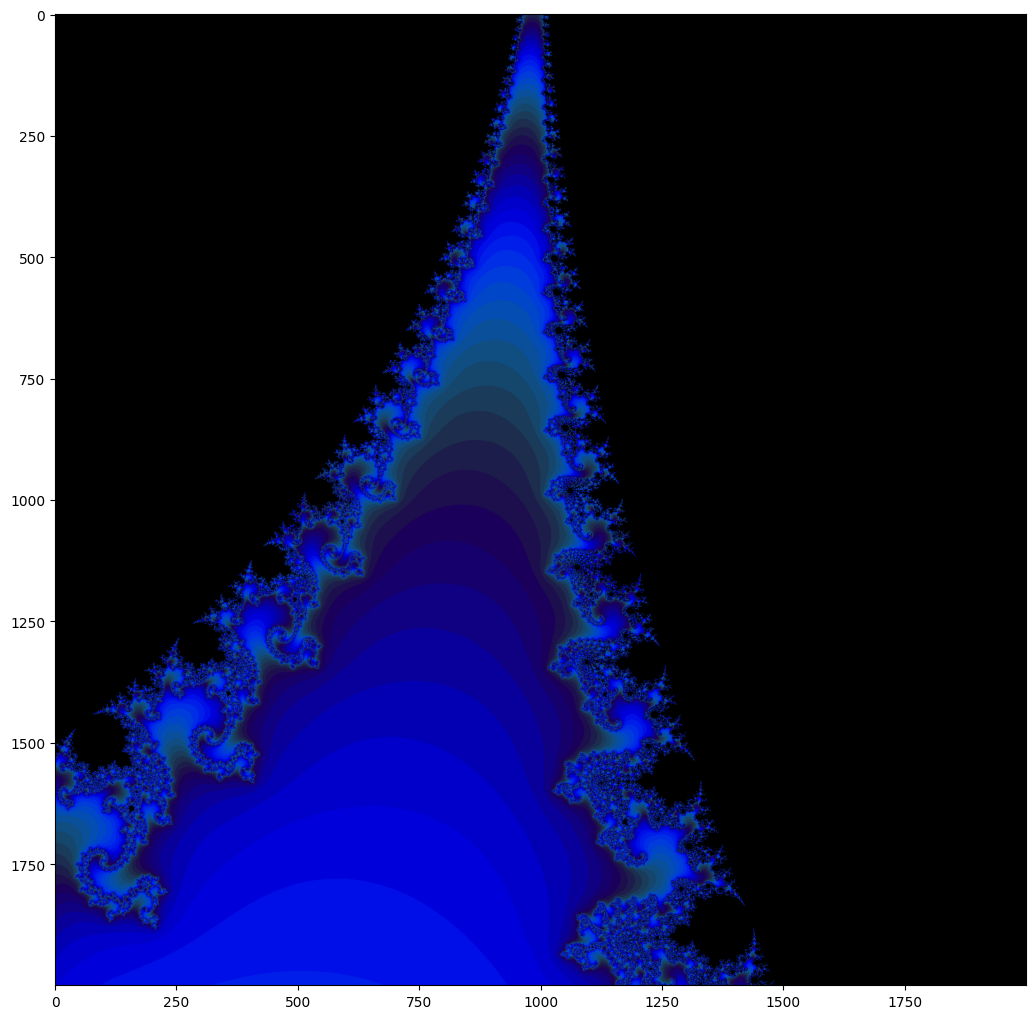

In [ ]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[0.05:0.25:0.0001, -0.85:-0.65:0.0001]

# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #生成的是一个复数的tensor z=x+yi(实部+虚部)
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

#Mandelbrot Set
for i in range(200): #200控制迭代的次数
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + z
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0    # |z| > 4
    #Update variables to compute
    ns += not_diverged
    zs = zs_

#plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1]) #通过迭代次数a进行周期性变换，生成用于着色的周期性的值a
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255)) #把图像数据进行裁剪到[0, 255]
    return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Q2. Modify the code so to show a Julia set rather than the Mandelbrot set.

In [ ]:
# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2]
Y, X = np.mgrid[-1.3:1.5:0.005, -2:1:0.005]

In [ ]:
# load into PyTorch tensors
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!

# A fixed parameter c
phi = (1 + np.sqrt(5)) / 2
c = (phi - 2) + (phi - 1) * 1j
c = complex(c.real, c.imag)

zs = z.clone() #Updated! ----- why here need to update????
ns = torch.zeros_like(z)

In [ ]:
# transfer to the GPU device
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [ ]:
#Julia Set
for i in range(200):
    #Compute the new values of z: z^2 + c
    zs_ = zs*zs + c
    #Have we diverged with this new value?
    not_diverged = torch.abs(zs_) < 4.0    # Why < 4.0????
    #Update variables to compute
    ns += not_diverged
    zs = zs_

<ipython-input-19-142891325d3d>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


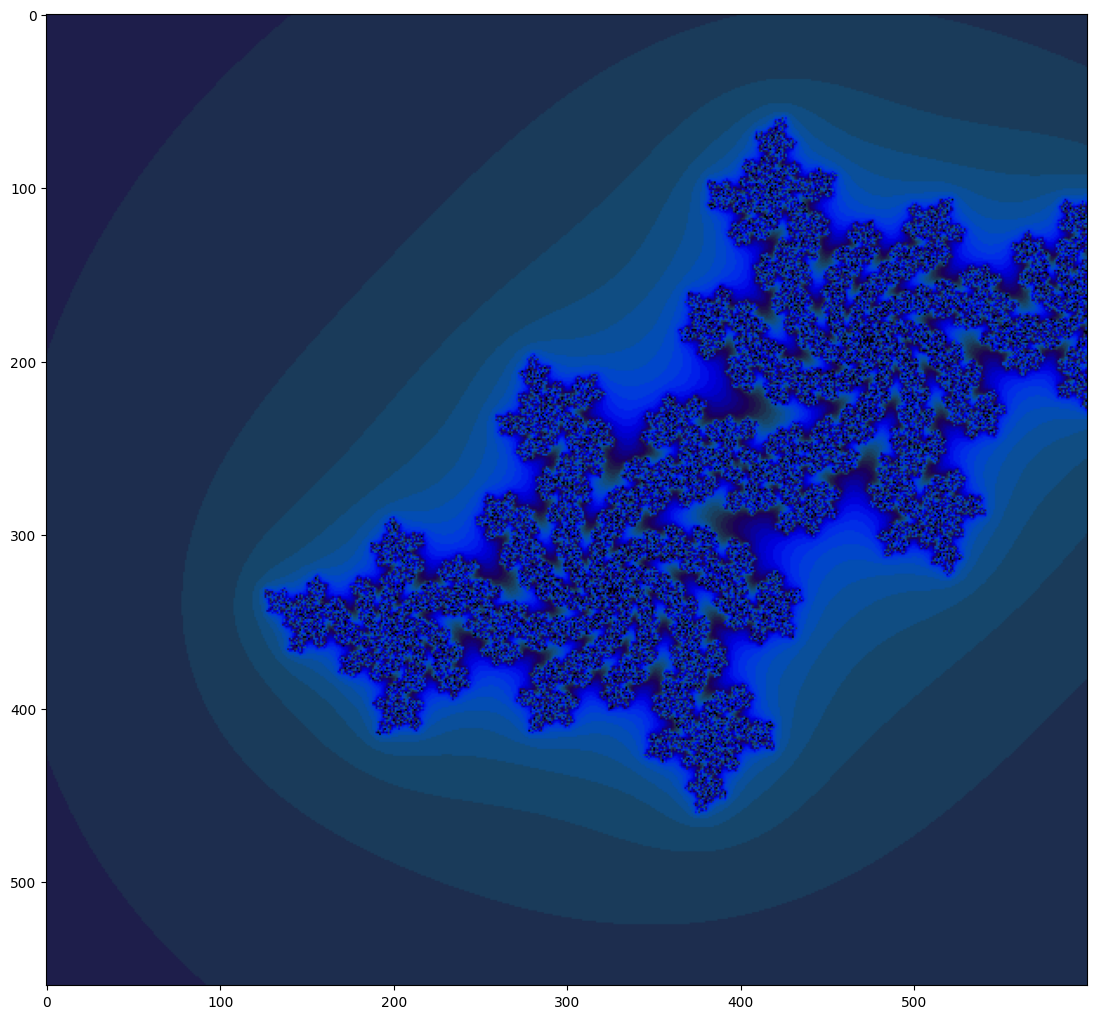

In [ ]:
#plot
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a

plt.imshow(processFractal(ns.cpu().numpy()).extent(-1.5, 1.5, -1.5, 1.5))
plt.tight_layout(pad=0)
plt.show()